# Quest3

## Part A. Web Scrapping

In [1]:
from bs4 import BeautifulSoup as bs
import requests as req
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
res = req.get("https://www.nasdaq.com/quotes/stock-quotes.aspx")

In [3]:
soup = bs(res.content, "html.parser")

## Parse HTML

In [4]:

tableNode = soup.select('td')

namelist = []
volumelist = []
percentlist = []

# 1~20
# 1 : Name
# 3 : PctChange
# 4 : Volume
for i in range(1,21):
    if i%4 == 0:
        volumelist.append(int(str(tableNode[i]).replace('<td>', '').replace(' </td>', '').replace(',', '')))
        conamestr = re.sub(r'</div>\n</td>', '', re.sub(r'<td>(?s).*coName small">', '', str(tableNode[i-3])))
        conamestr = re.sub(r',(s?).*','',conamestr.replace('Inc.', '').replace('Group', '').replace('Ltd.', '').replace('Technology', ''))
        namelist.append(conamestr.strip())
        percentchange = str(tableNode[i-1])
        if "▼" in percentchange:
            percentchange = float('-' + re.sub(r'\D.\D(?s).*</span></td>', '', re.sub(r'<td><span class=".*">', '', str(tableNode[i-1]))))
        else:
            percentchange = float(re.sub(r'\D.\D(?s).*</span></td>', '', re.sub(r'<td><span class=".*">', '', str(tableNode[i-1]))))

        percentlist.append(percentchange)

print(namelist)
print(volumelist)
print(percentlist)

['Micron', 'Invesco QQQ Trust', 'Marvell', 'Apple', 'Cronos']
[33688369, 29437880, 24076650, 19023979, 18921566]
[0.16, -0.45, -0.09, 0.38, 0.35]


/home/seungkilee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Flags not at the start of the expression '<td>(?s).*coName sma' (truncated)
  from ipykernel import kernelapp as app
/home/seungkilee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Flags not at the start of the expression '\\D.\\D(?s).*</span></' (truncated)


## Volume

In [5]:
%matplotlib inline

x = namelist
yval = volumelist
x_pos = [i for i, _ in enumerate(x)]

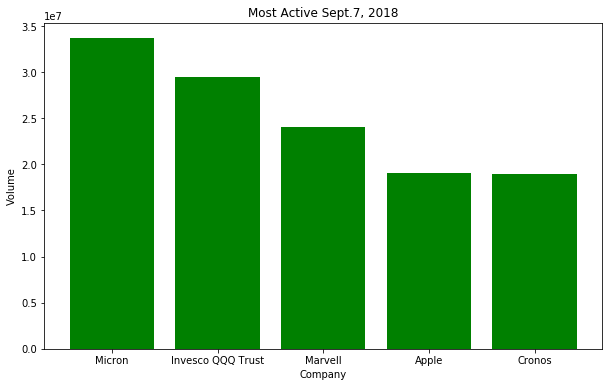

In [6]:
plt.figure(figsize=(10,6))
plt.bar(x_pos, yval, color='green')
plt.xticks(x_pos, x)
plt.xlabel("Company")
plt.ylabel("Volume")
plt.title("Most Active Sept.7, 2018")
plt.show()

In [7]:
%matplotlib inline

x = namelist
yval = percentlist
x_pos = [i for i, _ in enumerate(x)]

## Percent Change

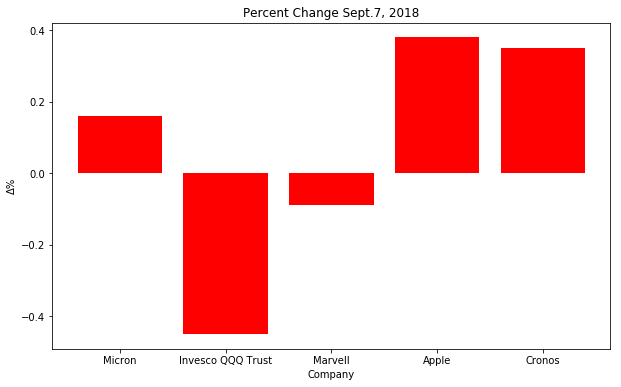

In [8]:
plt.figure(figsize=(10,6))
plt.bar(x_pos, yval, color='red')
plt.xticks(x_pos, x)
plt.xlabel("Company")
plt.ylabel("Δ%")
plt.title("Percent Change Sept.7, 2018")
plt.show()

## Part B. Timing Comparison

In [9]:
from collections import Counter
import random
# import string

In [37]:
# Utility function
def runtime(f):
    import timeit
    start = timeit.default_timer()
    f
    end = timeit.default_timer()
    print(end - start) 

In [38]:
# My Function
def wordsInStringToDictWordCount(istr):
    
    return_dict = {}
    
    if len(istr) > 1:      
        temp_list = istr.split()
        
        for i in temp_list:
            if i in return_dict:
                return_dict[i] += 1
            else:
                return_dict[i] = 1
                
    return return_dict

In [39]:
# Counter class
def beatTheCounter(istr):
    cnt = Counter()
    temp_list = istr.split()
    
    for i in temp_list:
        cnt[i] += 1

    return cnt

In [40]:
# File IO from url
# longstring = str(req.get('https://github.com/SeungKiLeeSMU/CSE5345-AdvancedApplicationProgramming/blob/master/Quest3-BeautifulSoup/lstring.txt').text.split())

with open('lstring.txt', 'r') as fstr:
    longstring = fstr.read().replace('\n', ' ')

In [52]:
mytime = runtime(wordsInStringToDictWordCount(longstring))
cnttime = runtime(beatTheCounter(longstring))

1.1169977369718254e-06
5.789988790638745e-07


The Counter Class took about half of the time it took for my function.

## Part C. Pytest for Regex

# Part D. CSV Files